In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def sdot1(s,t,params):
    M, P, Pr = s
    km0, km, K, n, kdm, kp, kdp = params

    rate_M_prod = km0 + km*(K**n/(Pr**n+K**n))
    rate_M_loss = kdm*M

    rate_P_prod = kp*M
    rate_P_loss = kdp*P
    
    dM = rate_M_prod - rate_M_loss
    dP = rate_P_prod - rate_P_loss
    dPr = 0 # initially assume repressor level steady
    
    ds = [dM, dP, dPr]
    return ds

# define parameter values
km0 = 0.01
km = 5
K = 500
n = 2
kdm = 0.1386
kp = 1.2
kdp = 0.0165

params = [km0, km, K, n, kdm, kp, kdp]

# define initial conditions
M0 = 0
P0 = 0
Pr0 = 0
Pr_high = 3000

s0 = [M0, P0, Pr0]
s1 = [M0, P0, Pr_high]

# define time observation points
t_start = 0
t_end = 1000

t_obs = np.arange(t_start, t_end+0.1, 1)


# run simulation
s_obs_absent = odeint(sdot1, s0, t_obs, args=(params,))
s_obs_high = odeint(sdot1, s1, t_obs, args=(params,))

# extract the observations
M_obs_absent = s_obs_absent[:,0]
P_obs_absent = s_obs_absent[:,1]

M_obs_high = s_obs_high[:, 0]
P_obs_high = s_obs_high[:, 1]

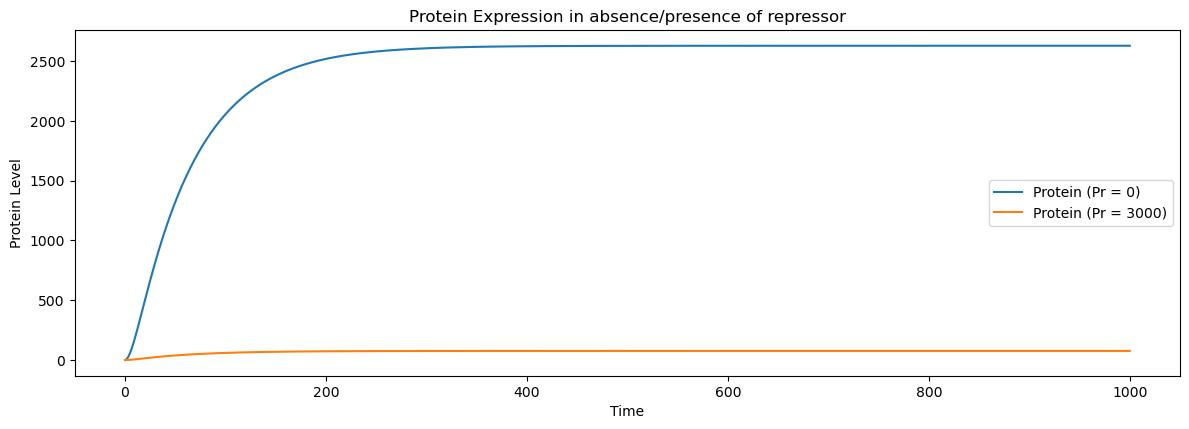

In [3]:
plt.figure(figsize=(12, 8))

# Plot protein levels
plt.subplot(2, 1, 2)
plt.plot(t_obs, P_obs_absent, label='Protein (Pr = 0)')
plt.plot(t_obs, P_obs_high, label='Protein (Pr = 3000)')
plt.xlabel('Time')
plt.ylabel('Protein Level')
plt.title('Protein Expression in absence/presence of repressor')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
Pr_vals = np.arange(0, 5000, 10)

P_ss_vals_n1 = []

for Pr in Pr_vals:
    km0 = 0.01
    km = 5
    K = 500
    n = 1
    kdm = 0.1386
    kp = 1.2
    kdp = 0.0165

    params = [km0, km, K, n, kdm, kp, kdp]

    # define initial conditions
    M0 = 0
    P0 = 0
    Pr0 = 0
    s0 = [0, 0, Pr]

    t_start = 0
    t_end = 1000
    t_obs = np.arange(t_start, t_end+ 0.1, 1)

    s_obs = odeint(sdot1, s0, t_obs, args=(params,))

    M_obs = s_obs[:,0]
    P_obs = s_obs[:,1]


    P_ss_vals_n1.append(P_obs[-1])

In [5]:
P_ss_vals_n2 = []

for Pr in Pr_vals:
    km0 = 0.01
    km = 5
    K = 500
    n = 2
    kdm = 0.1386
    kp = 1.2
    kdp = 0.0165

    params = [km0, km, K, n, kdm, kp, kdp]

    # define initial conditions
    M0 = 0
    P0 = 0
    Pr0 = 0
    s0 = [0, 0, Pr]

    t_start = 0
    t_end = 1000
    t_obs = np.arange(t_start, t_end+ 0.1, 1)

    s_obs = odeint(sdot1, s0, t_obs, args=(params,))

    M_obs = s_obs[:,0]
    P_obs = s_obs[:,1]


    P_ss_vals_n2.append(P_obs[-1])

In [6]:
P_ss_vals_n4 = []

for Pr in Pr_vals:
    km0 = 0.01
    km = 5
    K = 500
    n = 4
    kdm = 0.1386
    kp = 1.2
    kdp = 0.0165

    params = [km0, km, K, n, kdm, kp, kdp]

    # define initial conditions
    M0 = 0
    P0 = 0
    Pr0 = 0
    s0 = [0, 0, Pr]

    t_start = 0
    t_end = 1000
    t_obs = np.arange(t_start, t_end+ 0.1, 1)

    s_obs = odeint(sdot1, s0, t_obs, args=(params,))

    M_obs = s_obs[:,0]
    P_obs = s_obs[:,1]


    P_ss_vals_n4.append(P_obs[-1])

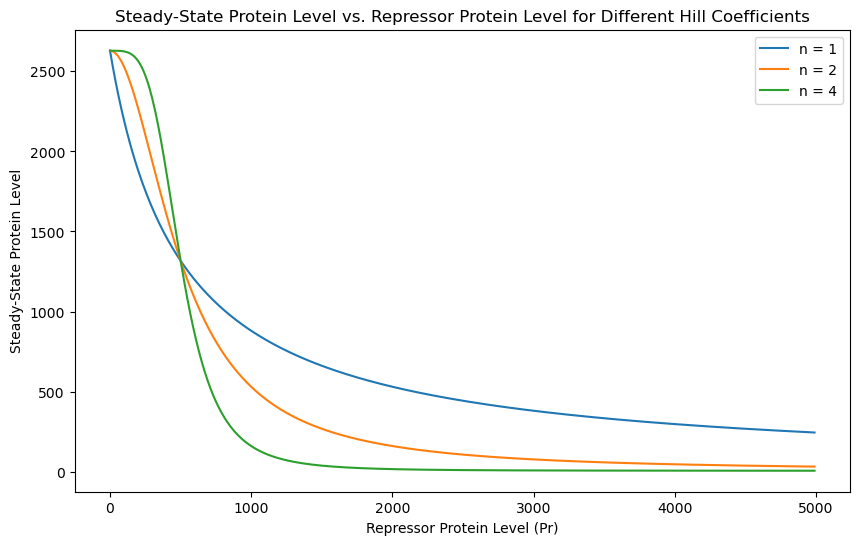

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(Pr_vals, P_ss_vals_n1, label='n = 1')
plt.plot(Pr_vals, P_ss_vals_n2, label='n = 2')
plt.plot(Pr_vals, P_ss_vals_n4, label='n = 4')
plt.xlabel('Repressor Protein Level (Pr)')
plt.ylabel('Steady-State Protein Level')
plt.title('Steady-State Protein Level vs. Repressor Protein Level for Different Hill Coefficients')
plt.legend()
plt.show()

In [8]:
Pr_vals = np.arange(0, 5000, 10)

P_ss_vals_km01 = []

for Pr in Pr_vals:
    km0 = 0.01
    km = 5
    K = 500
    n = 2
    kdm = 0.1386
    kp = 1.2
    kdp = 0.0165

    params = [km0, km, K, n, kdm, kp, kdp]

    # define initial conditions
    M0 = 0
    P0 = 0
    Pr0 = 0
    s0 = [0, 0, Pr]

    t_start = 0
    t_end = 1000
    t_obs = np.arange(t_start, t_end+ 0.1, 1)

    s_obs = odeint(sdot1, s0, t_obs, args=(params,))

    M_obs = s_obs[:,0]
    P_obs = s_obs[:,1]


    P_ss_vals_km01.append(P_obs[-1])

In [9]:
Pr_vals = np.arange(0, 5000, 10)

P_ss_vals_km02 = []

for Pr in Pr_vals:
    km0 = 0.1
    km = 5
    K = 500
    n = 2
    kdm = 0.1386
    kp = 1.2
    kdp = 0.0165

    params = [km0, km, K, n, kdm, kp, kdp]

    # define initial conditions
    M0 = 0
    P0 = 0
    Pr0 = 0
    s0 = [0, 0, Pr]

    t_start = 0
    t_end = 1000
    t_obs = np.arange(t_start, t_end+ 0.1, 1)

    s_obs = odeint(sdot1, s0, t_obs, args=(params,))

    M_obs = s_obs[:,0]
    P_obs = s_obs[:,1]


    P_ss_vals_km02.append(P_obs[-1])

In [10]:
Pr_vals = np.arange(0, 5000, 10)

P_ss_vals_km04 = []

for Pr in Pr_vals:
    km0 = 1
    km = 5
    K = 500
    n = 2
    kdm = 0.1386
    kp = 1.2
    kdp = 0.0165

    params = [km0, km, K, n, kdm, kp, kdp]

    # define initial conditions
    M0 = 0
    P0 = 0
    Pr0 = 0
    s0 = [0, 0, Pr]

    t_start = 0
    t_end = 1000
    t_obs = np.arange(t_start, t_end+ 0.1, 1)

    s_obs = odeint(sdot1, s0, t_obs, args=(params,))

    M_obs = s_obs[:,0]
    P_obs = s_obs[:,1]


    P_ss_vals_km04.append(P_obs[-1])

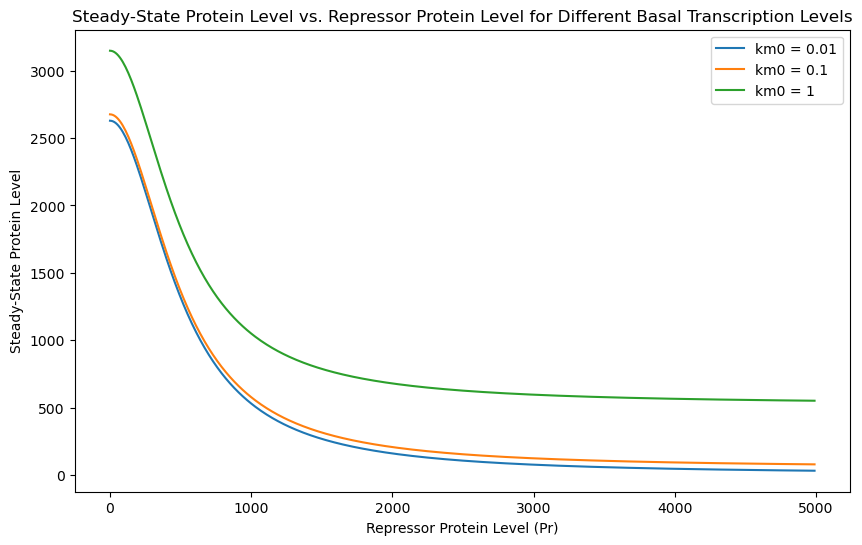

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(Pr_vals, P_ss_vals_km01, label='km0 = 0.01')
plt.plot(Pr_vals, P_ss_vals_km02, label='km0 = 0.1')
plt.plot(Pr_vals, P_ss_vals_km04, label='km0 = 1')
plt.xlabel('Repressor Protein Level (Pr)')
plt.ylabel('Steady-State Protein Level')
plt.title('Steady-State Protein Level vs. Repressor Protein Level for Different Basal Transcription Levels')
plt.legend()
plt.show()